In [1]:
!pip install pandas==1.2.4
!pip install unidecode

     |████████████████████████████████| 9.9 MB 4.7 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.2.4 which is incompatible.


     |████████████████████████████████| 241 kB 4.9 MB/s 


In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [4]:
sns.set()

In [5]:
#Descargar datasets desde github
!git clone https://github.com/andres-soto-h/monografia-udea-eacd.git

Cloning into 'monografia-udea-eacd'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


In [6]:
#Lectura del dataset transformado
df_propiedades=pd.read_csv('/content/monografia-udea-eacd/df_prop_clean.csv', delimiter=';', encoding='latin1')

## **Generalidades de la información**

In [7]:
df_propiedades.shape

(2478, 190)

In [8]:
df_propiedades.rename(columns={"municipio":"ubicacion"}, inplace=True)

**Tipo de Propiedad**

In [9]:
df_propiedades['inmuebles']=1
data = df_propiedades.groupby("tipo_propiedad")['inmuebles'].sum()

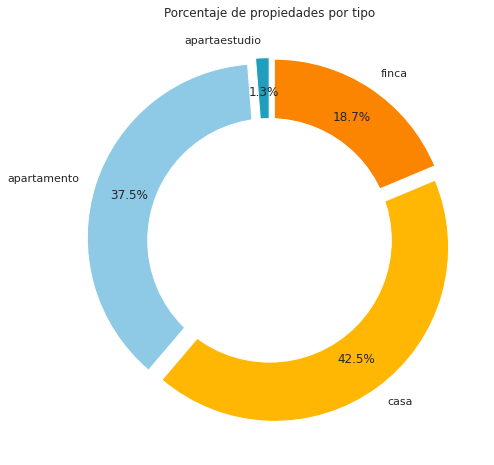

In [10]:
# Pie chart
colors = ['#219EBC','#8ECAE6','#FFB703','#FB8500']
explode = (0.05,0.05,0.05,0.05)
 
plt.figure(figsize=(10,8))
plt.pie(list(data), colors = colors, labels=list(data.index), autopct='%1.1f%%', startangle=90, pctdistance=0.8, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# ax1.xaxis.label.set_color('white')
# ax1.axis('equal')  
plt.title("Porcentaje de propiedades por tipo");
plt.show()

**Cantidad de propiedades por municipio**

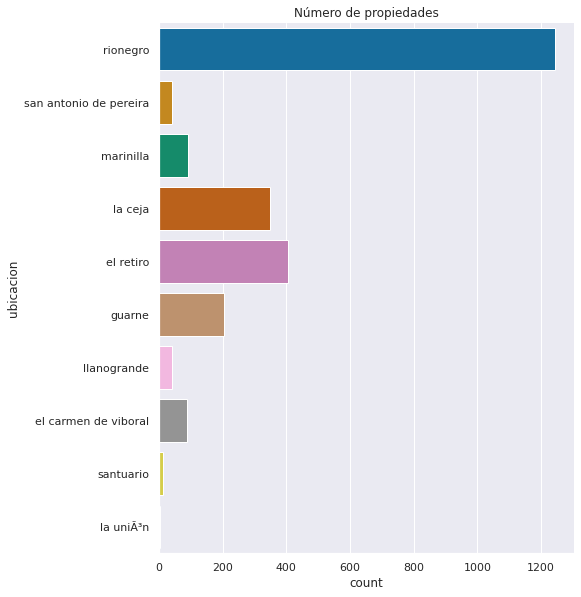

In [11]:
sns.catplot(y="ubicacion", kind="count", palette="colorblind",  data=df_propiedades, height=8)
plt.title("Número de propiedades");

In [12]:
df_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Columns: 191 entries, tipo to inmuebles
dtypes: float64(179), int64(1), object(11)
memory usage: 3.6+ MB


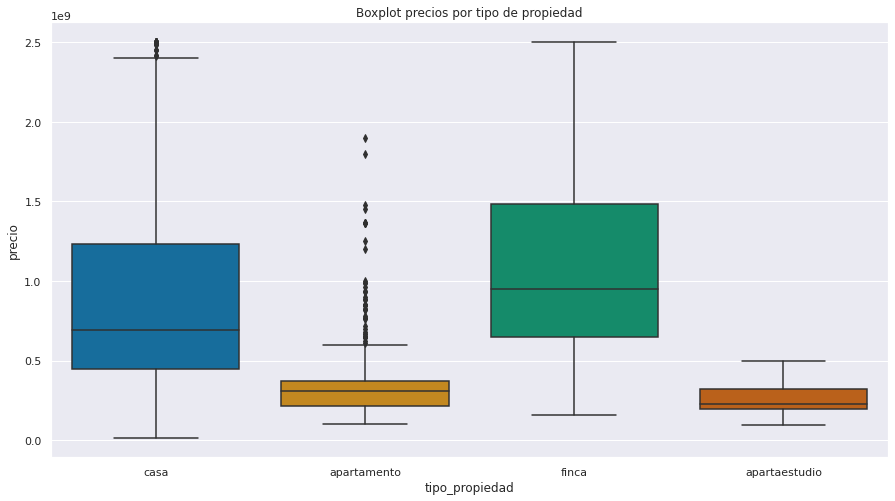

In [13]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="tipo_propiedad", y="precio", data=df_propiedades, palette="colorblind")
plt.title("Boxplot precios por tipo de propiedad");

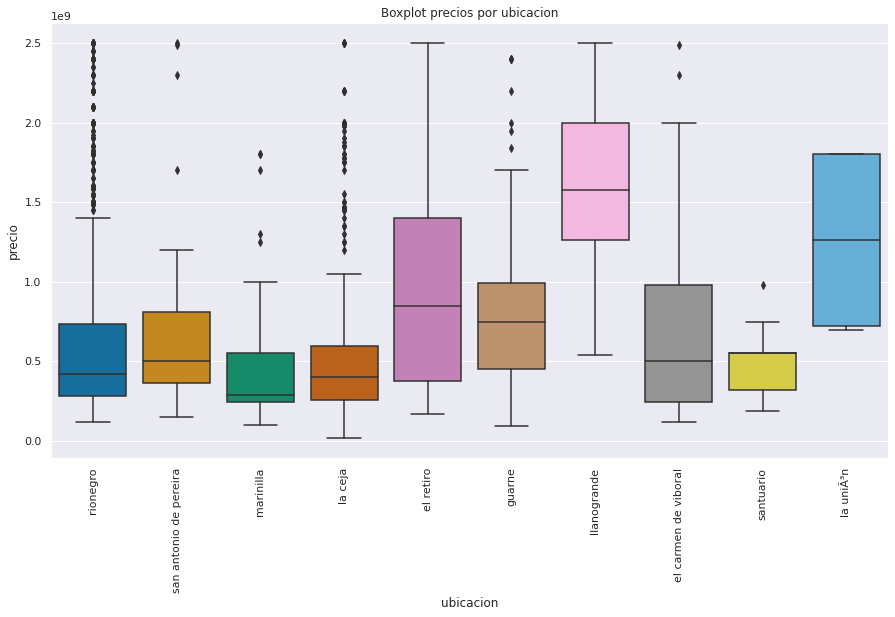

In [14]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(x="ubicacion", y="precio", data=df_propiedades, palette="colorblind")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Boxplot precios por ubicacion");

## **Modelamiento**

In [15]:
# Crear copia del dataframe y quitar columnas que no estarán en el modelo
data_model=df_propiedades.copy()
#columnas_quitar=['tipo','url','titulo','descripcion','caractint','caractext','caractsec']
columnas_quitar=['url','titulo','descripcion','caractint','caractext','caractsec']
data_model.drop(columnas_quitar, axis=1, inplace=True)
data_model.shape

(2478, 185)

In [16]:
# #Crear copia del dataframe y quitar columnas que no estarán en el modelo
# data_model=df_propiedades.copy()
# #columnas_quitar=['tipo','url','titulo','descripcion','caractint','caractext','caractsec']
# columnas = ['tipo','precio', 'area_m2','habitaciones','banos','garajes','estrato','antiguedad','tipo_propiedad','municipio']
# data_model = data_model[columnas]
# data_model.shape

In [17]:
# Separar los datos en las variables dependiente e independientes
X = data_model.drop('precio', axis=1)
y = data_model['precio']

In [18]:
# Realizar transformación sobre las variables categoricas para incluirlas en la regresión
X = pd.get_dummies(X, columns=['tipo','tipo_propiedad','ubicacion','antiguedad','estrato'], prefix=["estado","tipo","ubica","antig","estrato"] )

In [19]:
#Realizar división de los datos en entrenamiento y prueba (Se toma un 20% de los datos para test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(1982, 209)

In [21]:
sc = StandardScaler()

In [22]:
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform (X_test)

### **Métrica**

In [23]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### **Ajuste del Modelo**

#### **Regresión Ridge**

In [24]:
#Entrenar modelo ridge
model1 = Ridge(solver='lsqr')
model1.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [25]:
print("The model training score is" , model1.score(X_train, y_train))
print("The model test score is" , model1.score(X_test, y_test))

The model training score is 0.002568882005250961
The model test score is 0.00010349654154839794


In [26]:
# Generar métrica del modelo con base en predicciones en entrenamiento y test
MAPE_train = mean_absolute_percentage_error(y_train, model1.predict(X_train))
MAPE_test = mean_absolute_percentage_error(y_test, model1.predict(X_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 100.36907570452871
The model test MAPE is 93.76479758288492


#### **Random Forest**

In [27]:
#Entrenar modelo random forest
model3 = RandomForestRegressor(max_depth=10, random_state=0)
model3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [28]:
print("The model training score is" , model3.score(X_train, y_train))
print("The model test score is" , model3.score(X_test, y_test))

The model training score is 0.9379917614421728
The model test score is 0.6800957300410546


In [29]:
# Generar métrica del modelo con base en predicciones en entrenamiento y test
MAPE_train = mean_absolute_percentage_error(y_train, model3.predict(X_train))
MAPE_test = mean_absolute_percentage_error(y_test, model3.predict(X_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 15.563954751602132
The model test MAPE is 26.408219157296216


**Búsqueda de Hiperparámetros**

In [30]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)


In [31]:
#Entrenar modelo random forest con búsqueda de hyperparámetros
parameters = {'n_estimators':[60,65,70,75,80,90,100,105],  'max_depth':[8,9,10,11,12,13,14,15]}
rf = RandomForestRegressor(random_state=0)
clf = GridSearchCV(rf, param_grid=parameters, n_jobs=4, verbose=8, cv=rs)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.4s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   30.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   56.4s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 320 out of 320 | elapsed:  6.1min finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                             

In [32]:
modelo4 = clf.best_estimator_
modelo4

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [33]:
print("The model training score is" , modelo4.score(X_train, y_train))
print("The model test score is" , modelo4.score(X_test, y_test))

The model training score is 0.9637900317860497
The model test score is 0.6895574855572323


In [34]:
# Generar métrica del modelo con base en predicciones en entrenamiento y test
MAPE_train = mean_absolute_percentage_error(y_train, modelo4.predict(X_train))
MAPE_test = mean_absolute_percentage_error(y_test, modelo4.predict(X_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 10.882066163706007
The model test MAPE is 25.432983905718615


In [35]:
error_data = X_test.copy()

In [36]:
error_data["prediction"]=modelo4.predict(X_test)

In [37]:
error_data["y_true"]=y_test

In [39]:
error_data["error_type"]=abs(error_data["prediction"]-error_data["y_true"])
error_data["error_type"]

1753    2.978782e+07
259     5.890305e+07
2072    2.482607e+06
1000    2.696227e+07
56      5.944134e+07
            ...     
764     2.447465e+07
212     1.542296e+08
1855    1.052289e+08
2379    3.302216e+07
2423    1.061353e+09
Name: error_type, Length: 496, dtype: float64

In [47]:
X = data_model.drop('precio', axis=1)
error_data=error_data.join(X["ubicacion"])

ValueError: ignored

In [48]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
top_errors = error_data.sort_values(by="error_type", ascending=False).head(50)

In [49]:
top_errors["ubicacion"].value_counts()

rionegro                  21
el retiro                  9
la ceja                    6
guarne                     5
santuario                  3
el carmen de viboral       2
marinilla                  2
san antonio de pereira     1
llanogrande                1
Name: ubicacion, dtype: int64

In [50]:
X["ubicacion"].value_counts()

rionegro                  1242
el retiro                  406
la ceja                    349
guarne                     205
marinilla                   90
el carmen de viboral        87
llanogrande                 42
san antonio de pereira      40
santuario                   13
la uniÃ³n                    4
Name: ubicacion, dtype: int64

In [51]:
top_errors.describe()

AttributeError: ignored

       area_m2  habitaciones  banos  ...     y_true      error  error_type
count       50            50     50  ...         50         50          50
mean      3796             4      4  ... 1465185500  823230709   823230709
std       7537             1      1  ...  782659038  295448904   295448904
min          3             2      1  ...  254275000  515789933   515789933
25%        322             3      2  ...  750000000  622141983   622141983
50%        495             4      4  ... 1450000000  722621735   722621735
75%       3925             4      5  ... 2237500000  935392569   935392569
max      38400             9      7  ... 2500000000 1810724737  1810724737

[8 rows x 213 columns]

In [52]:
format_dict = {'prediction':'${0:,.0f}','y_true':'${0:,.0f}','error':'${0:,.0f}'}

top_errors[["prediction","y_true","error_type","ubicacion"]].sort_values(by="ubicacion", ascending=False).style.format(format_dict)

ImportError: ignored